In [19]:
set.seed(123)

Математическое пояснение:
Задаем параметры нормального распределения N(μ, σ²), где:
- μ — математическое ожидание (среднее),
- σ — стандартное отклонение (квадратный корень из дисперсии σ²).
Параметры: μ = 0, σ = 1.5.

Простыми словами:
Мы выбрали нормальное распределение (как колокол), где среднее — 0, а разброс — 1.5.
Это как рост людей вокруг нулевой отметки с небольшим отклонением.

In [21]:
# Параметры нормального распределения
mu <- 0       # Среднее
sigma <- 1.5  # Стандартное отклонение

Математическое пояснение:
Генерируем выборки из N(0, 1.5²) с разными объемами: N=100, 500, 1000.
Функция rnorm(n, mean, sd) создает n случайных чисел с заданным средним и стандартным отклонением.

Простыми словами:
Создаем три набора чисел: маленький (100), средний (500) и большой (1000).
Это как взять 100, 500 или 1000 случайных измерений роста.

In [22]:
# Генерируем выборки разного объема
sample_100 <- rnorm(100, mean = mu, sd = sigma)
sample_500 <- rnorm(500, mean = mu, sd = sigma)
sample_1000 <- rnorm(1000, mean = mu, sd = sigma)

Математическое пояснение:
Гистограмма показывает частотное распределение: значения делятся на интервалы (бины),
высота столбцов — это количество значений в каждом интервале.

Простыми словами:
Рисуем графики, где видно, какие числа встречаются чаще. Это как подсчитать,
сколько людей с каким ростом у нас получилось, и показать это столбцами.

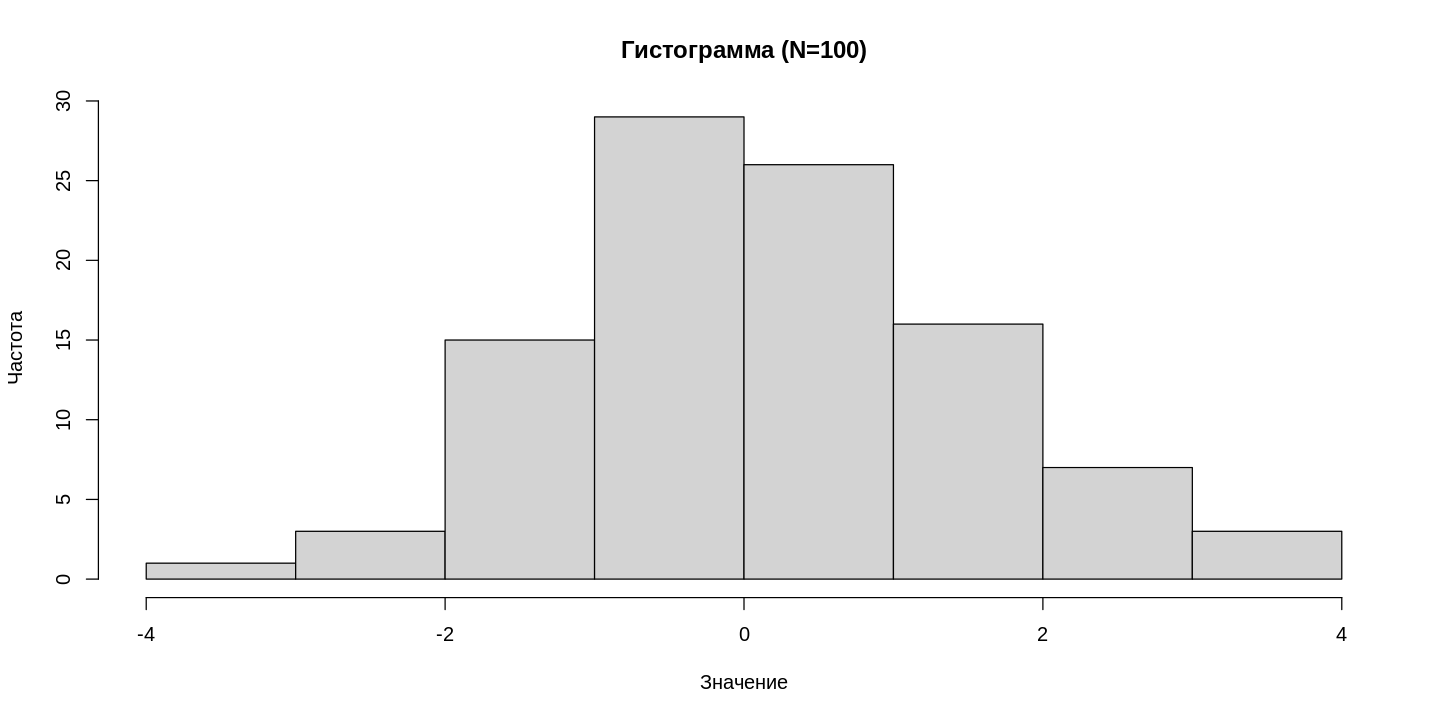

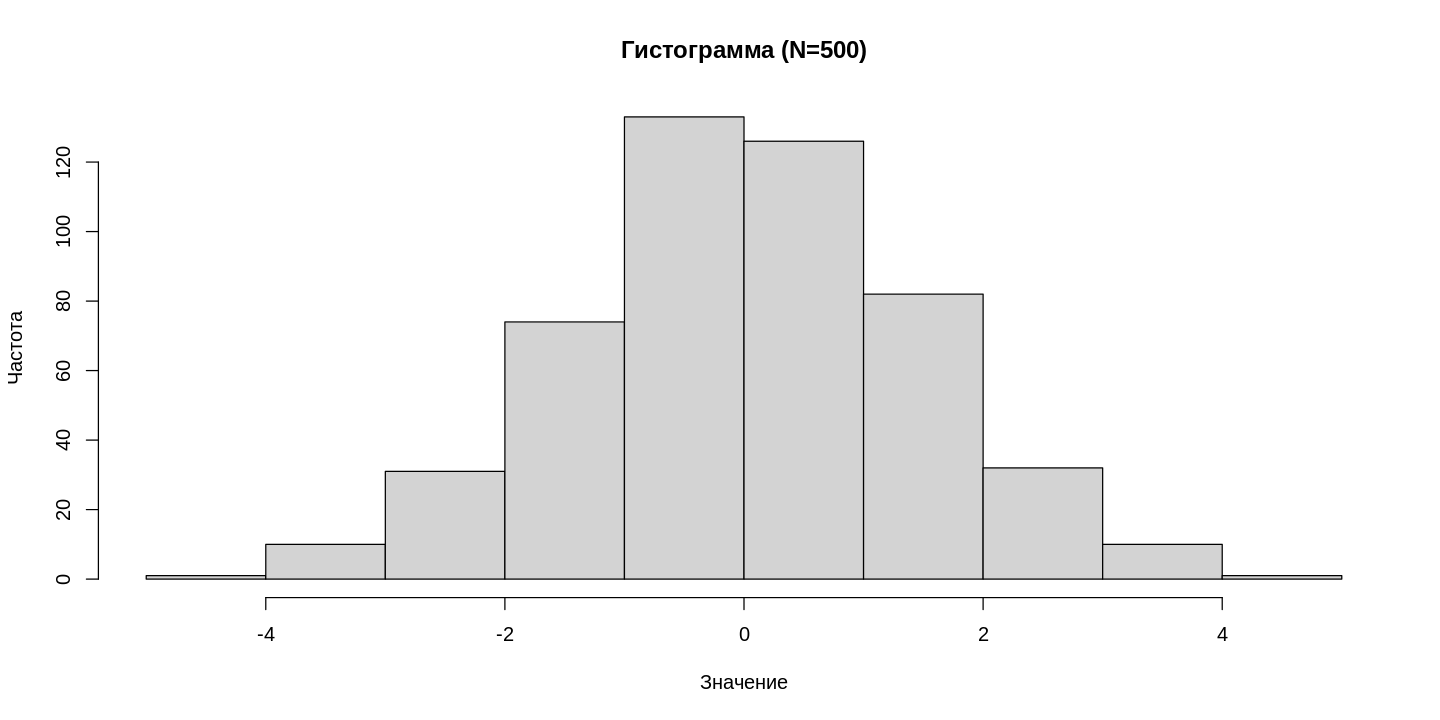

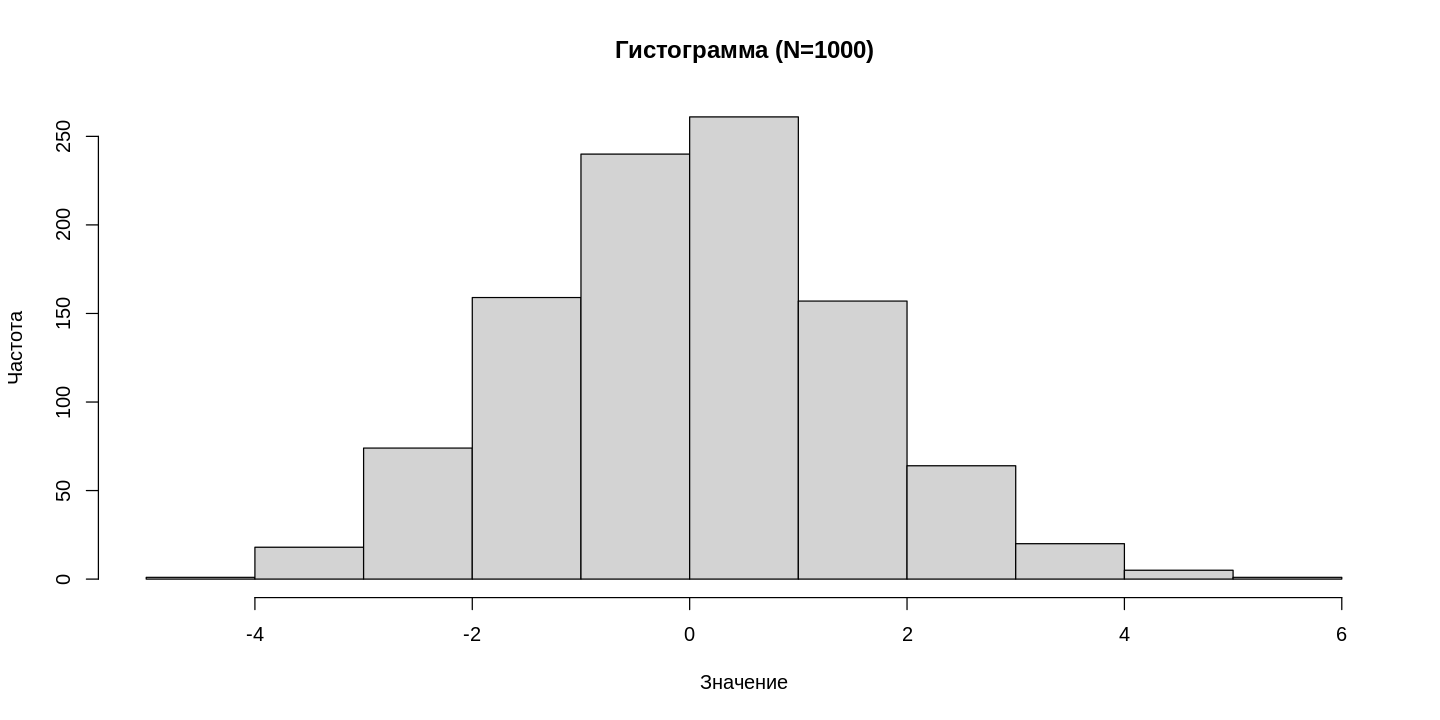

In [25]:
# Гистограммы для каждой выборки
hist(sample_100, main = "Гистограмма (N=100)", xlab = "Значение", ylab = "Частота")
hist(sample_500, main = "Гистограмма (N=500)", xlab = "Значение", ylab = "Частота")
hist(sample_1000, main = "Гистограмма (N=1000)", xlab = "Значение", ylab = "Частота")

Математическое пояснение:
Q-Q график сравнивает квантили выборки с теоретическими квантилями нормального распределения.
Если точки лежат на прямой, данные соответствуют нормальному распределению.
par(mfrow) задает сетку для размещения графиков в одном окне.

Простыми словами:
Эти графики проверяют, похожи ли наши числа на идеальный колокол.
Если точки на красной линии — все нормально, если разбросаны — данные странные.

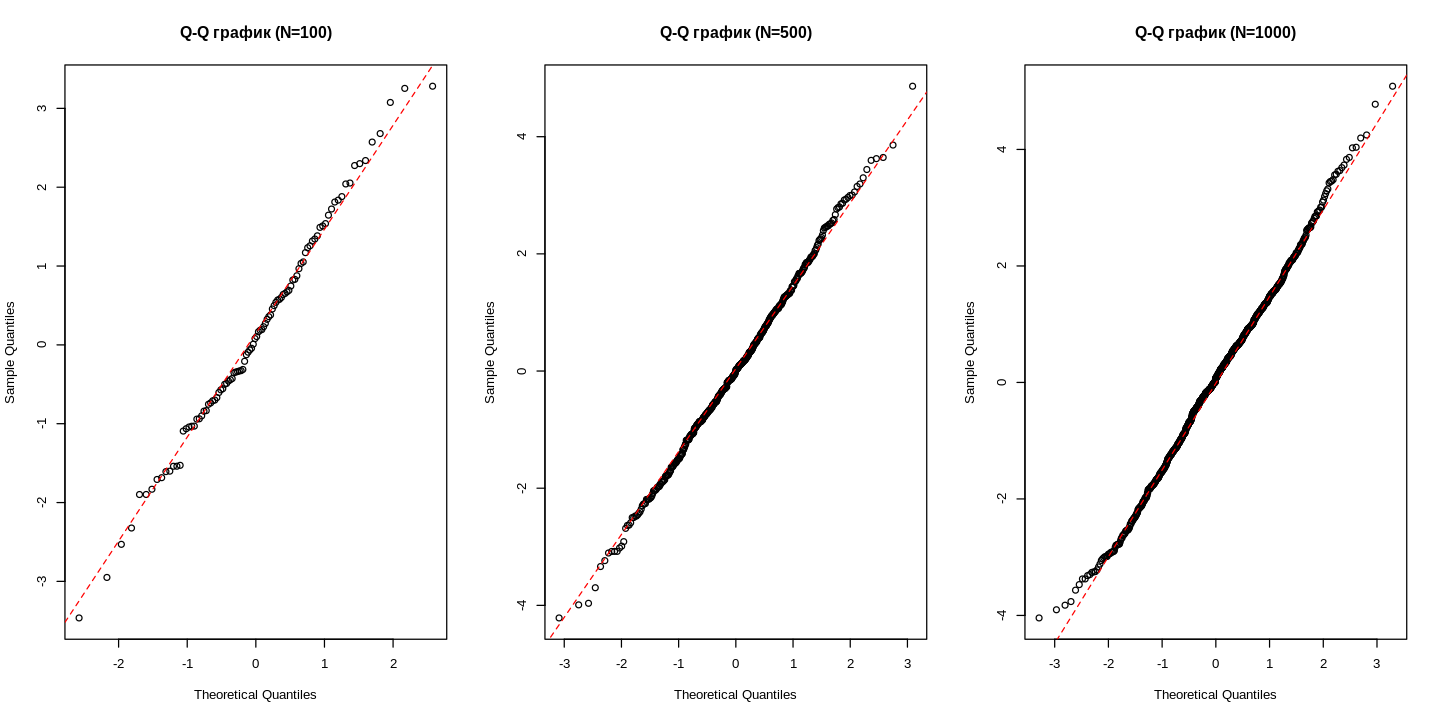

In [24]:
# Квантильные графики (Q-Q plots)
par(mfrow = c(1, 3))  # Три графика в ряд
qqnorm(sample_100, main = "Q-Q график (N=100)")
qqline(sample_100, col = "red", lty = 2)  # Красная пунктирная линия — теоретическая норма
qqnorm(sample_500, main = "Q-Q график (N=500)")
qqline(sample_500, col = "red", lty = 2)
qqnorm(sample_1000, main = "Q-Q график (N=1000)")
qqline(sample_1000, col = "red", lty = 2)
par(mfrow = c(1, 1))  # Возвращаем стандартный режим

Математическое пояснение:
Вычисляем выборочные характеристики:
- Среднее: x̄ = (1/N) ∑ x_i — среднее арифметическое.
- Дисперсия: s² = (1/(N-1)) ∑ (x_i - x̄)² — мера разброса.
- СКО: s = √s² — стандартное отклонение, показывает разброс вокруг среднего.

Простыми словами:
Считаем, какое типичное значение (среднее), насколько числа разные (дисперсия),
и как далеко они в среднем от центра (СКО).

In [26]:
# Выборочные характеристики для каждой выборки
cat("N=100:\n")
cat("Среднее:", mean(sample_100), "\n")
cat("Дисперсия:", var(sample_100), "\n")
cat("СКО:", sd(sample_100), "\n")

cat("\nN=500:\n")
cat("Среднее:", mean(sample_500), "\n")
cat("Дисперсия:", var(sample_500), "\n")
cat("СКО:", sd(sample_500), "\n")

cat("\nN=1000:\n")
cat("Среднее:", mean(sample_1000), "\n")
cat("Дисперсия:", var(sample_1000), "\n")
cat("СКО:", sd(sample_1000), "\n")

N=100:
Среднее: 0.1356089 
Дисперсия: 1.874774 
СКО: 1.369224 

N=500:
Среднее: 0.01207391 
Дисперсия: 2.15022 
СКО: 1.466363 

N=1000:
Среднее: 0.02956756 
Дисперсия: 2.236005 
СКО: 1.495328 


Математическое пояснение:
Доверительный интервал (CI) для среднего с известной дисперсией: x̄ ± z * (σ / √n),
где z — квантиль N(0,1) для уровня доверия 95% (1.96), σ — известное стандартное отклонение,
n — объем выборки.

Простыми словами:
Это диапазон, где с вероятностью 95% находится настоящее среднее.
Мы знаем σ=1.5, поэтому используем нормальное распределение.

In [27]:
# Функция для вычисления доверительного интервала
confidence_interval <- function(x, sigma, alpha = 0.05) {
  n <- length(x)           # Объем выборки
  mean_x <- mean(x)        # Выборочное среднее
  z <- qnorm(1 - alpha/2)  # Квантиль 1.96 для 95%
  margin_error <- z * (sigma / sqrt(n))  # Погрешность
  ci_lower <- mean_x - margin_error      # Нижняя граница
  ci_upper <- mean_x + margin_error      # Верхняя граница
  return(c(lower = ci_lower, upper = ci_upper))
}

# Вычисляем для каждой выборки (σ = 1.5)
ci_100 <- confidence_interval(sample_100, sigma = sigma)
ci_500 <- confidence_interval(sample_500, sigma = sigma)
ci_1000 <- confidence_interval(sample_1000, sigma = sigma)

# Вывод результатов
cat("\nДоверительный интервал для N=100:", ci_100, "\n")
cat("Доверительный интервал для N=500:", ci_500, "\n")
cat("Доверительный интервал для N=1000:", ci_1000, "\n")


Доверительный интервал для N=100: -0.1583857 0.4296035 
Доверительный интервал для N=500: -0.1194045 0.1435523 
Доверительный интервал для N=1000: -0.06340169 0.1225368 


Математическое пояснение:
Доверительный интервал с неизвестной дисперсией: x̄ ± t * (s / √n),
где t — квантиль t-распределения с df = n-1, s — выборочное СКО, n — объем выборки.

Простыми словами:
То же самое, но мы не знаем σ, поэтому берем s из выборки и используем t-распределение,
которое лучше для небольших выборок.

In [28]:
# Функция для вычисления доверительного интервала с t-распределением
t_confidence_interval <- function(x, alpha = 0.05) {
  n <- length(x)           # Объем выборки
  mean_x <- mean(x)        # Выборочное среднее
  s <- sd(x)               # Выборочное СКО
  df <- n - 1              # Степени свободы
  t_value <- qt(1 - alpha/2, df)  # Квантиль t-распределения для 95%
  margin_error <- t_value * (s / sqrt(n))  # Погрешность
  ci_lower <- mean_x - margin_error        # Нижняя граница
  ci_upper <- mean_x + margin_error        # Верхняя граница
  return(c(lower = ci_lower, upper = ci_upper))
}

# Вычисляем для каждой выборки
t_ci_100 <- t_confidence_interval(sample_100)
t_ci_500 <- t_confidence_interval(sample_500)
t_ci_1000 <- t_confidence_interval(sample_1000)

# Вывод результатов
cat("\nT-Доверительный интервал для N=100:", t_ci_100, "\n")
cat("T-Доверительный интервал для N=500:", t_ci_500, "\n")
cat("T-Доверительный интервал для N=1000:", t_ci_1000, "\n")


T-Доверительный интервал для N=100: -0.1360748 0.4072926 
T-Доверительный интервал для N=500: -0.1167686 0.1409164 
T-Доверительный интервал для N=1000: -0.06322453 0.1223597 


Математическое пояснение:
Ширина доверительного интервала = верхняя граница - нижняя граница.
Она уменьшается с ростом n, т.к. погрешность пропорциональна 1/√n.
График показывает зависимость ширины от объема выборки.

Простыми словами:
Считаем, насколько широкий диапазон у интервалов, и рисуем график,
чтобы показать, что чем больше выборка, тем точнее результат.

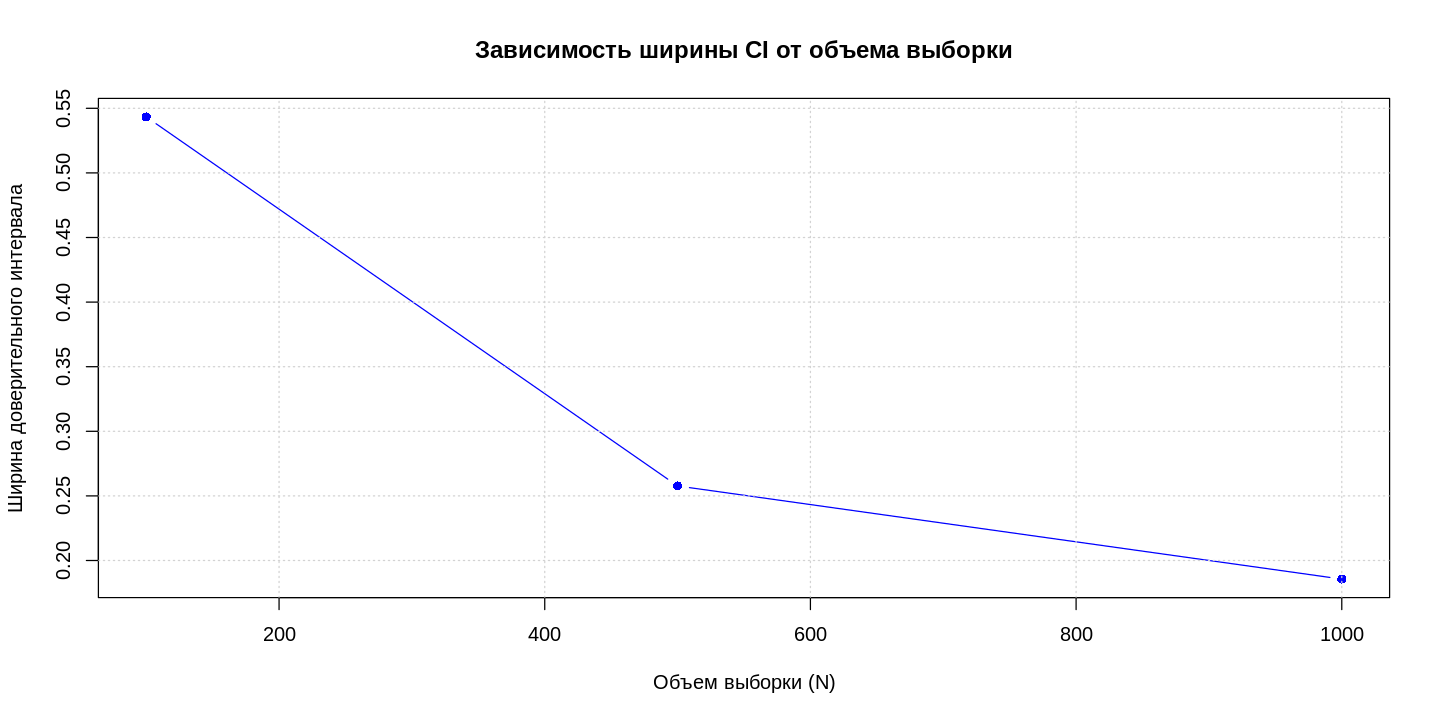

In [30]:
# Вычисляем ширину интервалов
width_100 <- t_ci_100[2] - t_ci_100[1]
width_500 <- t_ci_500[2] - t_ci_500[1]
width_1000 <- t_ci_1000[2] - t_ci_1000[1]

# Данные для графика
sample_sizes <- c(100, 500, 1000)
widths <- c(width_100, width_500, width_1000)

# График зависимости ширины от объема выборки
plot(sample_sizes, widths, type = "b", pch = 16,
     xlab = "Объем выборки (N)", ylab = "Ширина доверительного интервала",
     main = "Зависимость ширины CI от объема выборки",
     col = "blue")
grid()  # Добавляем сетку для читаемости